In [ ]:
import glob
from collections import defaultdict

from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
ifiles = sorted(glob.glob('/Data/sat/downloads/sentinel1/AI4Arctic_ASIP_Sea_Ice_Dataset_v2/east/*nc'))
for ncfile in ifiles:
    print(ncfile)
    ds = Dataset(ncfile)
    sar = ds['nersc_sar_secondary'][::10, ::10]
    v89 = ds['btemp_89.0v'][:]
    polygo = ds['polygon_icechart'][::10, ::10]
    fig, ax = plt.subplots(1,3)
    ax[0].imshow(sar)
    ax[1].imshow(v89)
    ax[2].imshow(polygo)
    plt.show()    


In [ ]:
counts = defaultdict(list)
ifiles = sorted(glob.glob('/data1/antonk/satellite-data-pipeline/asip_v2/outputs/*npz'))
print(len(ifiles))
for ifile in ifiles:
    f = np.load(ifile)
    icetype = f['ice_type']
    for i in range(4):
        count = np.where(icetype[:,:,i] == 1)[0].size
        counts[i].append(count)


Total samples:  16656


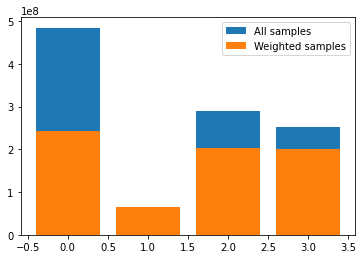

In [60]:
print('Total samples: ', len(counts[0]))
counts_sum = np.array([sum(counts[i]) for i in counts])
class_weights = np.array([0.5, 1, 0.7, 0.8])

plt.bar(range(4), counts_sum, label='All samples')
plt.bar(range(4), counts_sum*class_weights, label='Weighted samples')
plt.legend()